In [1]:
import pyam 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

In [2]:
operational = pyam.IamDataFrame(r'combined_operational_all_stock_iamdf.csv', sep=';')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file combined_operational_all_stock_iamdf.csv


In [3]:
embodied = pyam.IamDataFrame(r'combined_embodied_all_stock_iamdf.csv', sep=';')

pyam.core - INFO: Reading file combined_embodied_all_stock_iamdf.csv


In [27]:
def wlc_graph_sensibility(combined_operational_iamdf, combined_embodied_iamdf, year=None):
    # Filter operational scenarios with extreme cases
    ## BAU scenarios
    operational_bau_mrs_constant = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                     scenario='BAU_construction_Constant_MRS_rising_HDS_Constant').data['value'].sum()
    operational_bau_hrs_constant = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                     scenario='BAU_construction_Constant_HRS_rising_HDS_Constant').data['value'].sum()
    operational_bau_mrs_half = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                 scenario='BAU_construction_Half_MRS_rising_HDS_Half').data['value'].sum()
    operational_bau_hrs_half = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                 scenario='BAU_construction_Half_HRS_rising_HDS_Half').data['value'].sum()
    operational_bau_mrs_quarter = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                    scenario='BAU_construction_Quarter_MRS_rising_HDS_Quarter').data['value'].sum()
    operational_bau_hrs_quarter = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                    scenario='BAU_construction_Quarter_HRS_rising_HDS_Quarter').data['value'].sum()

    ## Sufficiency scenarios
    operational_sufficiency_mrs_constant = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                             scenario='S2_construction_Constant_MRS_rising_MDS_Constant').data['value'].sum()
    operational_sufficiency_hrs_constant = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                             scenario='S2_construction_Constant_HRS_rising_MDS_Constant').data['value'].sum()
    operational_sufficiency_mrs_half = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                         scenario='S2_construction_Half_MRS_rising_MDS_Half').data['value'].sum()
    operational_sufficiency_hrs_half = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                         scenario='S2_construction_Half_HRS_rising_MDS_Half').data['value'].sum()
    operational_sufficiency_mrs_quarter = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                            scenario='S2_construction_Quarter_MRS_rising_MDS_Quarter').data['value'].sum()
    operational_sufficiency_hrs_quarter = combined_operational_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                            scenario='S2_construction_Quarter_HRS_rising_MDS_Quarter').data['value'].sum()

    # Filter embodied scenarios with extreme cases
    ## BAU scenarios
    embodied_bau_mrs_re2020 = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                             scenario='BAU_construction_BAU_RE2020_upfront_MRS_rising_BAU_RE2020_WLC_HDS_Constant_WLC').data['value'].sum()
    embodied_bau_hrs_re2020 = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                             scenario='BAU_construction_BAU_RE2020_upfront_HRS_rising_BAU_RE2020_WLC_HDS_Constant_WLC').data['value'].sum()
    embodied_bau_mrs_re2020_extended = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                      scenario='BAU_construction_Optimist_RE2020_upfront_MRS_rising_Optimist_RE2020_WLC_HDS_Constant_WLC').data['value'].sum()
    embodied_bau_hrs_re2020_extended = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                      scenario='BAU_construction_Optimist_RE2020_upfront_HRS_rising_Optimist_RE2020_WLC_HDS_Constant_WLC').data['value'].sum()

    ## Sufficiency scenarios
    embodied_sufficiency_mrs_re2020 = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                     scenario='S2_construction_BAU_RE2020_upfront_MRS_rising_BAU_RE2020_WLC_MDS_Constant_WLC').data['value'].sum()
    embodied_sufficiency_hrs_re2020 = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                     scenario='S2_construction_BAU_RE2020_upfront_HRS_rising_BAU_RE2020_WLC_MDS_Constant_WLC').data['value'].sum()
    embodied_sufficiency_mrs_re2020_extended = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                              scenario='S2_construction_Optimist_RE2020_upfront_MRS_rising_Optimist_RE2020_WLC_MDS_Constant_WLC').data['value'].sum()
    embodied_sufficiency_hrs_re2020_extended = combined_embodied_iamdf.filter(year=year, variable='Residential_dwelling',
                                                                              scenario='S2_construction_Optimist_RE2020_upfront_HRS_rising_Optimist_RE2020_WLC_MDS_Constant_WLC').data['value'].sum()


    # Create a stacked bar chart with custom colors
    scenarios = ['BAU_MRS_Constant',  'BAU_MRS_Tech', 'BAU_HRS_Constant', 'BAU_HRS_Tech',
                 'Sufficiency_MRS_Constant', 'Sufficiency_MRS_Tech', 'Sufficiency_HRS_Constant', 'Sufficiency_HRS_Tech']
    operational_values = [operational_bau_mrs_constant, operational_bau_mrs_quarter, operational_bau_hrs_constant, operational_bau_hrs_quarter,
                          operational_sufficiency_mrs_constant, operational_sufficiency_mrs_quarter, operational_sufficiency_hrs_constant, operational_sufficiency_hrs_quarter]
    embodied_values = [embodied_bau_mrs_re2020, embodied_bau_mrs_re2020_extended, embodied_bau_hrs_re2020, embodied_bau_hrs_re2020_extended,
                       embodied_sufficiency_mrs_re2020, embodied_sufficiency_mrs_re2020_extended, embodied_sufficiency_hrs_re2020, embodied_sufficiency_hrs_re2020_extended]

    plt.figure(figsize=(20, 8))
    plt.bar(scenarios, operational_values, label='Operational', color='#FFBA08')
    plt.bar(scenarios, embodied_values, label='Embodied', bottom=operational_values, color='#1C3144')
    plt.xticks(rotation=45)
    plt.xticks(fontsize=14, fontweight='bold')

    # plt.xlabel('Scenario')
    plt.ylabel('MtCO2eq', fontsize=16, fontweight='bold')
    plt.title(f'Whole life GHGE in {year}', fontsize=20, fontweight='bold')

    # Add horizontal lines at specific y-values
    plt.axhline(y=7, color='lightgray', linestyle='--', label='SNBC operational')
    plt.axhline(y=10, color='darkgray', linestyle='--', label='SDS embodied')
    plt.axhline(y=17, color='black', linestyle='--', label='SNBC + SDS')

    plt.legend()
    plt.show()

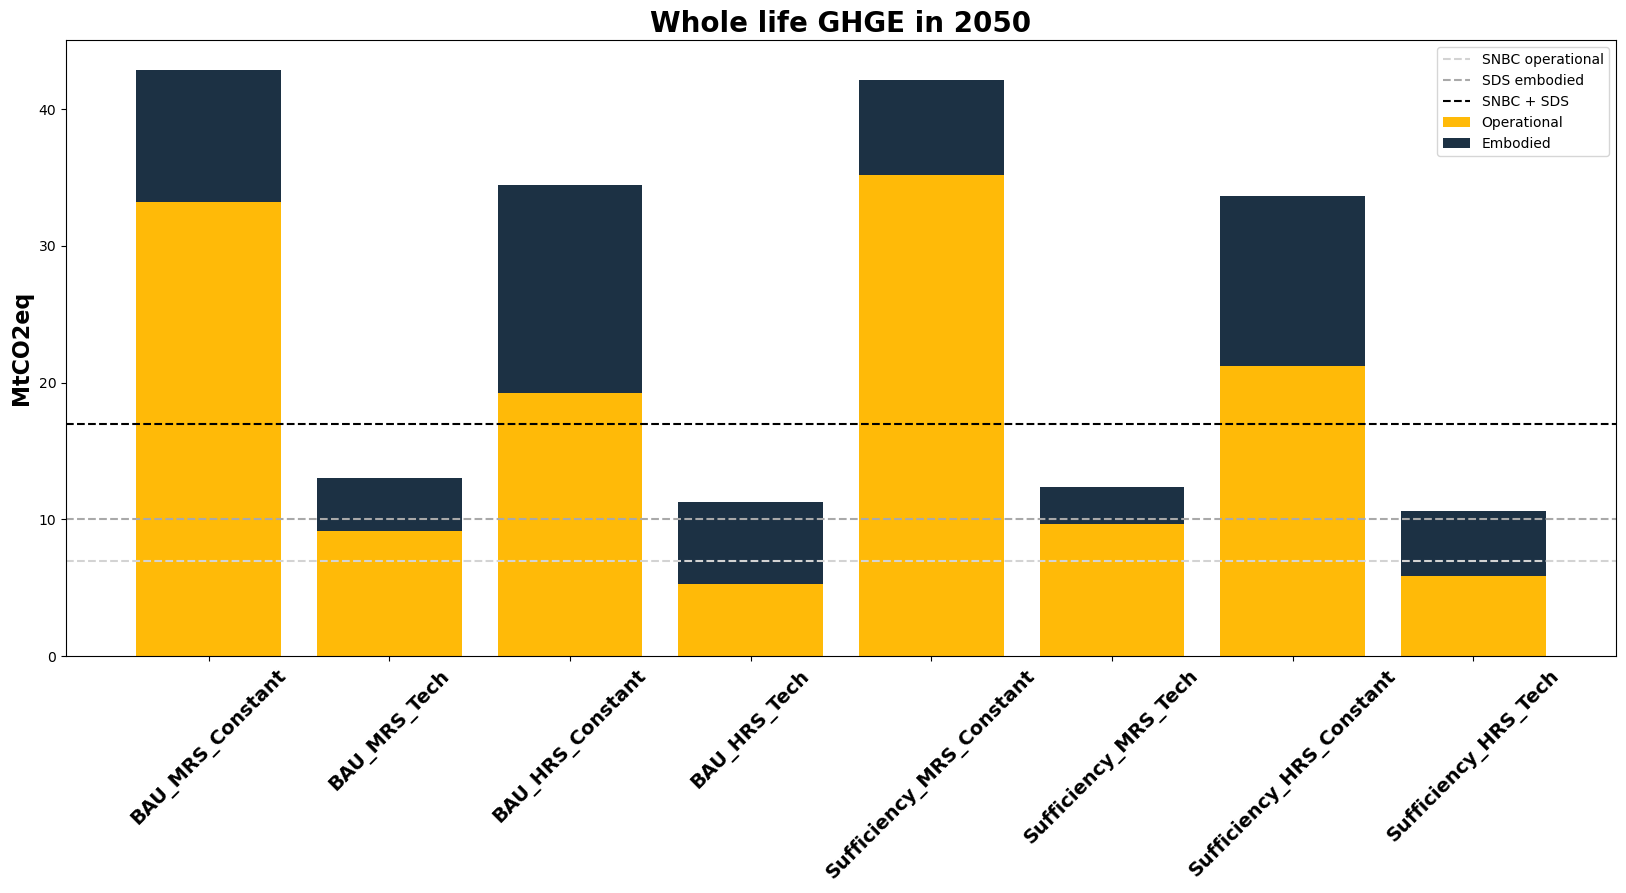

In [28]:
fig_2050 =  wlc_graph_sensibility(operational, embodied, year=2050)

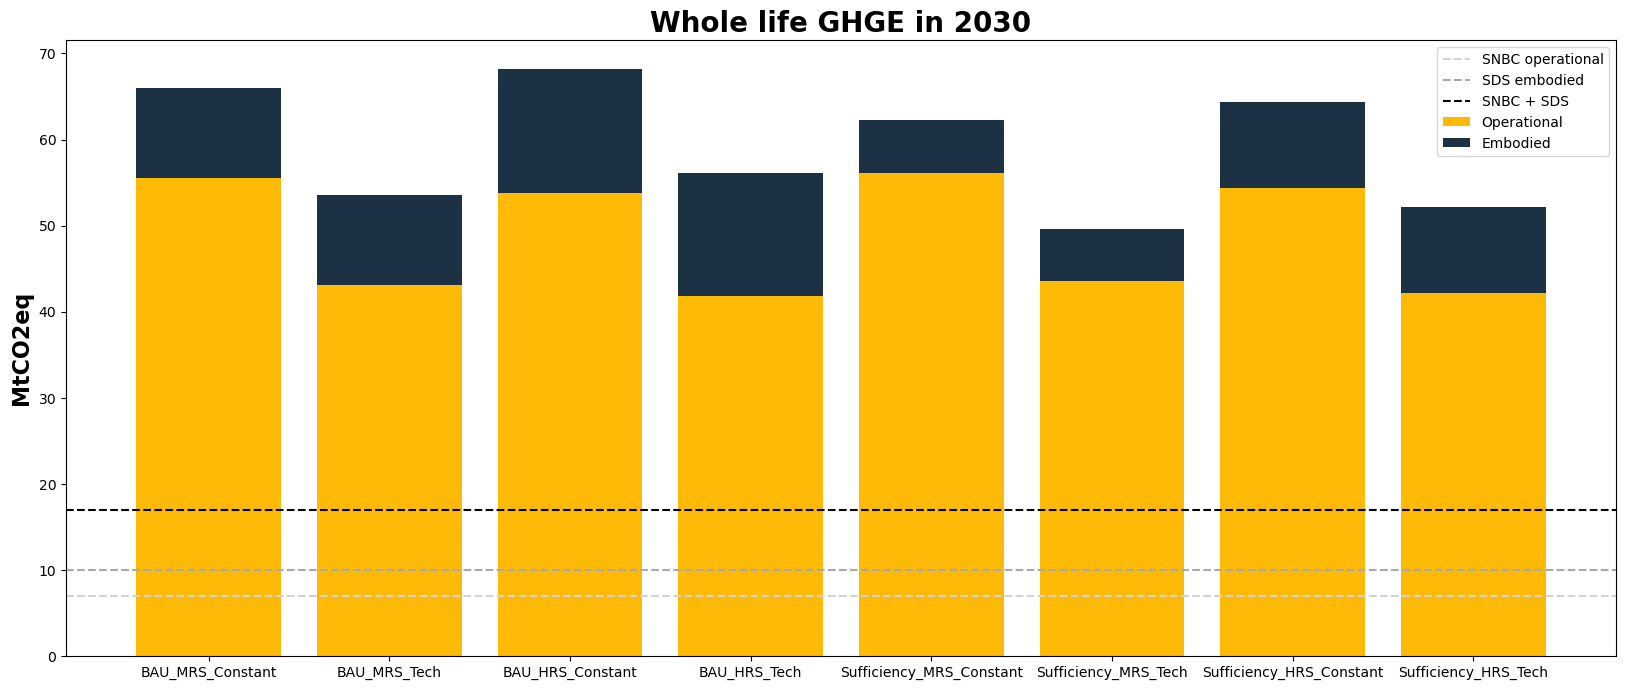

In [18]:
fig_2050 =  wlc_graph_sensibility(operational, embodied, year=2030)

In [43]:
embodied.data

,model,scenario,region,variable,unit,year,programmation,value
0,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,Demolition,0.078032
1,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,New_construction,6.527052
2,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,Renovation,0.224138
3,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2021,Demolition,0.078032
4,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2021,New_construction,6.527052
...,...,...,...,...,...,...,...,...
17851,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2049,New_construction,1.075283
17852,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2049,Renovation,1.456019
17853,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2050,Demolition,0.190812
17854,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2050,New_construction,1.076857


In [59]:
def drop_inconsistent_embodied_scenarios(combined_embodied_iamdf):
    # Define a dictionary of requirements for different parts of the scenario name
    requirement_dict = {
        'BAU_construction': 'HDS',  # {parts[0]}_{parts[1]} == part[10]
        'S2_construction': 'MDS',   # {parts[0]}_{parts[1]} == part[10]
        'BAU_RE2020_upfront': 'BAU_RE2020_WLC',  # {parts[2]}_{parts[3]}_{parts[4]} == 'BAU_RE2020_upfront'
        'Optimist_RE2020_upfront': 'Optimist_RE2020_WLC'  # {parts[2]}_{parts[3]}_{parts[4]} == 'Optimist_RE2020_upfront'
        # Add more requirements as needed
    }

    # Create an empty list to store scenarios to keep
    scenarios_to_keep = []

    # Iterate through scenario names
    for scenario in combined_embodied_iamdf.data['scenario']:
        # Split the scenario name into parts using underscores
        parts = scenario.split("_")

        # Check if the scenario name has at least 11 parts (parts[0] to parts[10])
        if len(parts) >= 11:
            # Check if text0_text1 is in the requirement_dict
            if f'{parts[0]}_{parts[1]}' in requirement_dict:
                # Check if text5 matches the requirement for text0_text1
                if parts[10] == requirement_dict[f'{parts[0]}_{parts[1]}']:
                    # Check if the combination of parts[2]_parts[3]_parts[4] matches the requirement
                    matching_requirement = requirement_dict.get(f'{parts[2]}_{parts[3]}_{parts[4]}', None)
                    if matching_requirement is not None and f'{parts[7]}_{parts[8]}_{parts[9]}' == matching_requirement:
                        scenarios_to_keep.append(scenario)

    # Create a new IamDataFrame with the desired scenarios
    filtered_iamdf = combined_embodied_iamdf.filter(scenario=scenarios_to_keep)
    
    return filtered_iamdf

# Example usage:
# new_combined_embodied_iamdf = drop_inconsistent_embodied_scenarios(combined_embodied_iamdf)


In [61]:
df = drop_inconsistent_embodied_scenarios(embodied)

In [62]:
df.data

,model,scenario,region,variable,unit,year,programmation,value
0,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,Demolition,0.078032
1,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,New_construction,6.527052
2,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2020,Renovation,0.224138
3,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2021,Demolition,0.078032
4,CSTB,BAU_construction_BAU_RE2020_upfront_HRS_normal...,France,Collective_dwelling,MtCO2eq,2021,New_construction,6.527052
...,...,...,...,...,...,...,...,...
4459,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2049,New_construction,1.075283
4460,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2049,Renovation,1.456019
4461,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2050,Demolition,0.190812
4462,CSTB,S2_construction_Optimist_RE2020_upfront_MRS_ri...,France,Residential_dwelling,MtCO2eq,2050,New_construction,1.076857


In [63]:
df.to_csv(r'test.csv', sep=';')

In [2]:
operational_bau = pyam.IamDataFrame(r'operational_bau.csv', sep=';')
operational_optimistic = pyam.IamDataFrame(r'operational_optimistic.csv', sep=';')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file operational_bau.csv
pyam.core - INFO: Reading file operational_optimistic.csv


In [3]:
embodied_bau = pyam.IamDataFrame(r'embodied_bau.csv', sep=';')
embodied_optimistic = pyam.IamDataFrame(r'embodied_optimistic.csv', sep=';')

pyam.core - INFO: Reading file embodied_bau.csv
pyam.core - INFO: Reading file embodied_optimistic.csv


In [6]:
embodied_bau.data

,model,scenario,region,variable,unit,year,programmation,value
0,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2020,Demolition,0.379709
1,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2020,New_construction,10.785574
2,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2020,Renovation,0.173546
3,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2021,Demolition,0.379709
4,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2021,New_construction,10.785574
...,...,...,...,...,...,...,...,...
88,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2049,New_construction,5.430694
89,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2049,Renovation,3.860588
90,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2050,Demolition,0.379709
91,CSTB,BAU,France,Residential_dwelling,MtCO2eq,2050,New_construction,5.430694


In [20]:
def plot_embodied_all_stock(df, title=None):
    
    # Filter df by programmation
    df_construction = df.filter(programmation='New_construction').data
    df_renovation = df.filter(programmation='Renovation').data
    df_demolition = df.filter(programmation='Demolition').data
    
    # Custom colors for each programmation
    construction_color = '#e07a5f'
    renovation_color = '#f4f1de'
    demolition_color = '#3d405b'
    
    years=df_construction['year']
    construction_values = df_construction['value']
    renovation_values = df_renovation['value']
    demolition_values = df_demolition['value']
    
    plt.figure(figsize=(10, 8))  

    # Plot stacked bar chart
    plt.bar(years, construction_values, label='New Construction', color=construction_color)
    plt.bar(years, renovation_values, label='Renovation', bottom=construction_values, color=renovation_color)
    plt.bar(years, demolition_values, label='Demolition', bottom=construction_values + renovation_values,
            color=demolition_color)

    # Matplotlib setting
    plt.legend(loc='upper right', fontsize=12)
    plt.title(title, fontsize=20, fontweight="bold")

    plt.xlabel("Year", fontsize=16, fontweight="bold")
    plt.ylabel("MtCO2eq", fontsize=16, fontweight="bold")

    plt.ylim(0, 20)

    plt.tight_layout()
    plt.show()

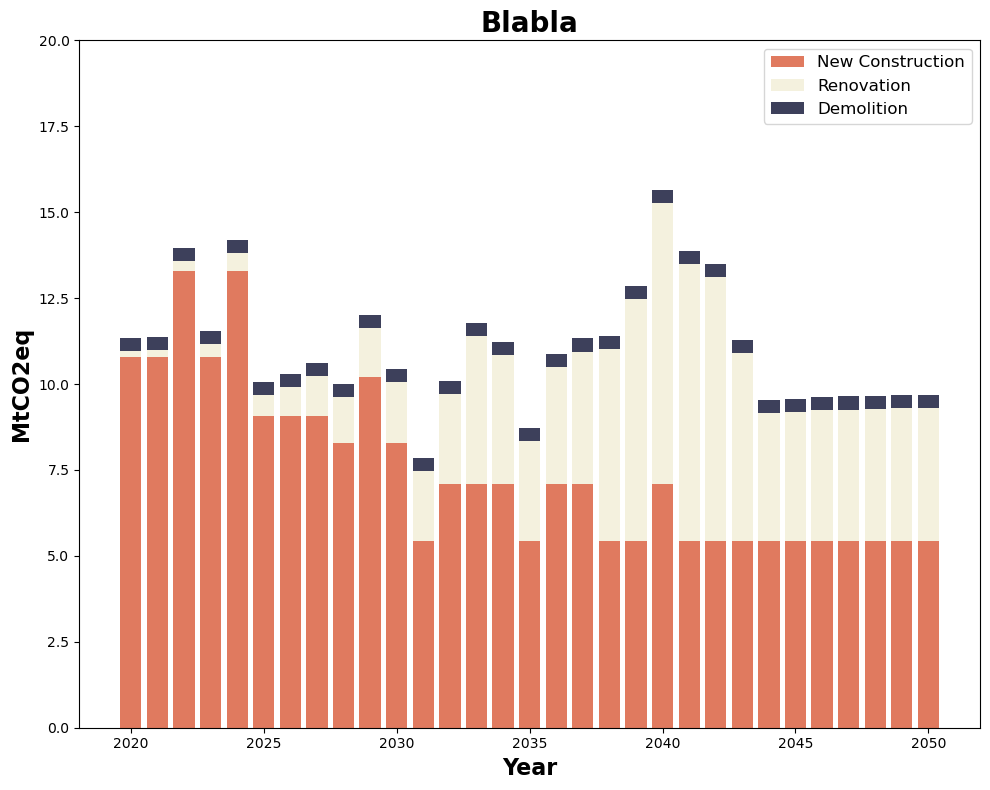

In [22]:
plot_embodied_all_stock(embodied_bau, title='Blabla')

In [ ]:
def plot_embodied_all_stock(df, title=None):
    # Filter df by programmation
    df_construction = df[df['programmation'] == 'New_construction']
    df_renovation = df[df['programmation'] == 'Renovation']
    df_demolition = df[df['programmation'] == 'Demolition']

    # Extract years and values for each programmation
    years = df_construction['year'].unique()
    construction_values = df_construction.groupby('year')['value'].sum()
    renovation_values = df_renovation.groupby('year')['value'].sum()
    demolition_values = df_demolition.groupby('year')['value'].sum()

    # Custom colors for each programmation
    construction_color = '#cc2936'
    renovation_color = '#233d4d'
    demolition_color = '#ff7f0e'

    # Matplotlib setting
    plt.figure(figsize=(10, 8))

    # Plot stacked bar chart
    plt.bar(years, construction_values, label='New Construction', color=construction_color)
    plt.bar(years, renovation_values, label='Renovation', bottom=construction_values, color=renovation_color)
    plt.bar(years, demolition_values, label='Demolition', bottom=construction_values + renovation_values,
            color=demolition_color)

    plt.legend(loc='upper right', fontsize=12)
    plt.title(title, fontsize=20, fontweight="bold")

    plt.xlabel("Year", fontsize=16, fontweight="bold")
    plt.ylabel("MtCO2eq", fontsize=16, fontweight="bold")

    plt.ylim(0, 20)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame with columns 'year', 'value', and 'programmation', and title is your plot title.
# You can call the function like this:
# plot_embodied_all_stock(df, title="Your Title")


In [ ]:
def wlc_graph(operational_bau, operational_optimistic, embodied_bau, embodied_optimistic, year=None):
    # Calculate the operational and embodied values for each scenario
    operational_bau_value = operational_bau.filter(year=year, variable='Residential_dwelling').data['value'].sum()
    operational_optimistic_value = operational_optimistic.filter(year=year, variable='Residential_dwelling').data[
        'value'].sum()
    embodied_bau_value = embodied_bau.filter(year=year, variable='Residential_dwelling').data['value'].sum()
    embodied_optimistic_value = embodied_optimistic.filter(year=year, variable='Residential_dwelling').data[
        'value'].sum()

    # Create a stacked bar chart with custom colors
    scenarios = ['BAU', 'Optimistic']
    operational_values = [operational_bau_value, operational_optimistic_value]
    embodied_values = [embodied_bau_value, embodied_optimistic_value]

    plt.figure(figsize=(10, 8))
    plt.bar(scenarios, operational_values, label='Operational', color='#cc2936')
    plt.bar(scenarios, embodied_values, label='Embodied', bottom=operational_values, color='#233d4d')
    # plt.xlabel('Scenario')
    plt.ylabel('MtCO2eq', fontsize=16, fontweight='bold')
    plt.title(f'Whole life GHGE in {year}', fontsize=20, fontweight='bold')

    # Add horizontal lines at specific y-values
    plt.axhline(y=7, color='lightgray', linestyle='--', label='SNBC operational')
    plt.axhline(y=10, color='darkgray', linestyle='--', label='SDS embodied')
    plt.axhline(y=17, color='black', linestyle='--', label='SNBC + SDS')

    plt.legend()
    plt.show()

In [4]:
operational_bau_value = operational_bau.filter(year=2050, variable='Residential_dwelling').data['value'].sum()
operational_bau_value

33.19814532227755

In [102]:
snbc = 7
sds = 13.2
aps = 34.7

In [ ]:
national_emissions_fr_2019 = 434.5 

In [103]:
34.7 + 7

41.7

In [114]:
def wlc_graph(operational_bau, operational_optimistic, embodied_bau, embodied_optimistic, year=None):
    # Calculate the operational and embodied values for each scenario
    operational_bau_value = operational_bau.filter(year=year, variable='Residential_dwelling').data['value'].sum()
    operational_optimistic_value = operational_optimistic.filter(year=year, variable='Residential_dwelling').data['value'].sum()
    embodied_bau_value = embodied_bau.filter(year=year, variable='Residential_dwelling').data['value'].sum()
    embodied_optimistic_value = embodied_optimistic.filter(year=year, variable='Residential_dwelling').data['value'].sum()

    # Create a stacked bar chart with custom colors
    scenarios = ['BAU', 'Optimistic']
    operational_values = [operational_bau_value, operational_optimistic_value]
    embodied_values = [embodied_bau_value, embodied_optimistic_value]

    plt.figure(figsize=(10, 8))
    plt.bar(scenarios, operational_values, label='Operational', color='brown')
    plt.bar(scenarios, embodied_values, label='Embodied', bottom=operational_values, color='lightgrey')
    #plt.xlabel('Scenario')
    plt.ylabel('MtCO2eq', fontsize=16, fontweight='bold')
    plt.title(f'Whole life GHGE in {year}', fontsize=20, fontweight='bold')
    
    # Add horizontal lines at specific y-values
    plt.axhline(y=7, color='lightgray', linestyle='--', label='Buildings SNBC')
    plt.axhline(y=20.2, color='navy', linestyle='--', label='SNBC + SDS')
    plt.axhline(y=41.7, color='black', linestyle='--', label='SNBC + APS')

    plt.legend()
    plt.show()

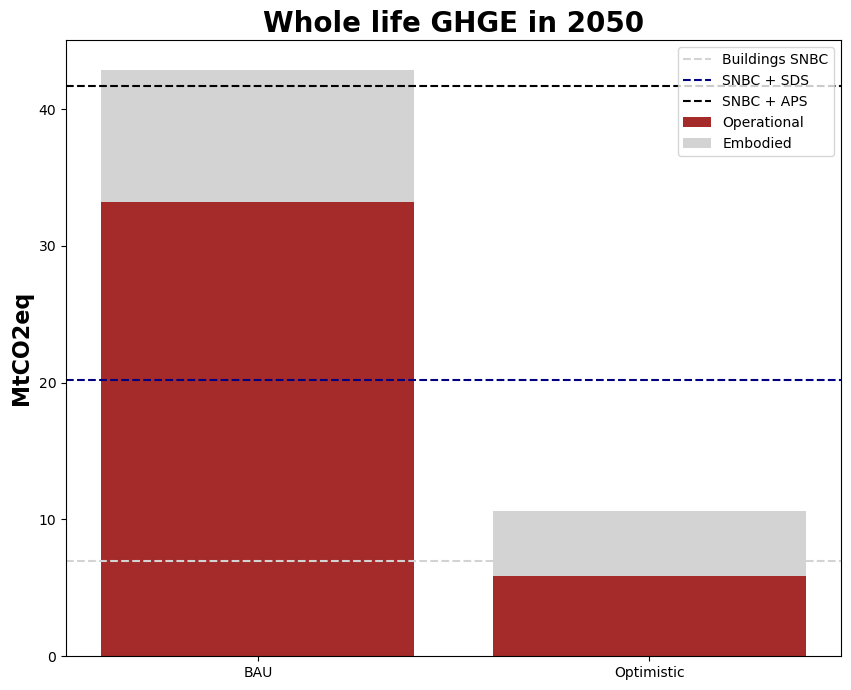

In [115]:
graph_2050 = wlc_graph(operational_bau, operational_optimistic, embodied_bau, embodied_optimistic, year=2050)

In [116]:
def wlc_cum_graph(operational_bau, operational_optimistic, embodied_bau, embodied_optimistic):
    # Calculate the operational and embodied values for each scenario
    operational_bau_value = operational_bau.filter(variable='Residential_dwelling').data['value'].sum()
    operational_optimistic_value = operational_optimistic.filter(variable='Residential_dwelling').data['value'].sum()
    embodied_bau_value = embodied_bau.filter(variable='Residential_dwelling').data['value'].sum()
    embodied_optimistic_value = embodied_optimistic.filter(variable='Residential_dwelling').data['value'].sum()

    # Create a stacked bar chart with custom colors
    scenarios = ['BAU', 'Optimistic']
    operational_values = [operational_bau_value, operational_optimistic_value]
    embodied_values = [embodied_bau_value, embodied_optimistic_value]

    plt.figure(figsize=(10, 8))
    plt.bar(scenarios, operational_values, label='Operational', color='brown')
    plt.bar(scenarios, embodied_values, label='Embodied', bottom=operational_values, color='lightgrey')
    #plt.xlabel('Scenario')
    plt.ylabel('MtCO2eq', fontsize=16, fontweight='bold')
    plt.title(f'Cumulated whole life GHGE', fontsize=20, fontweight='bold')
    
    # Add horizontal lines at specific y-values
    plt.axhline(y=434.5, color='black', linestyle='--', label='2019 French territorial GHGE')
    
    plt.legend()
    plt.show()

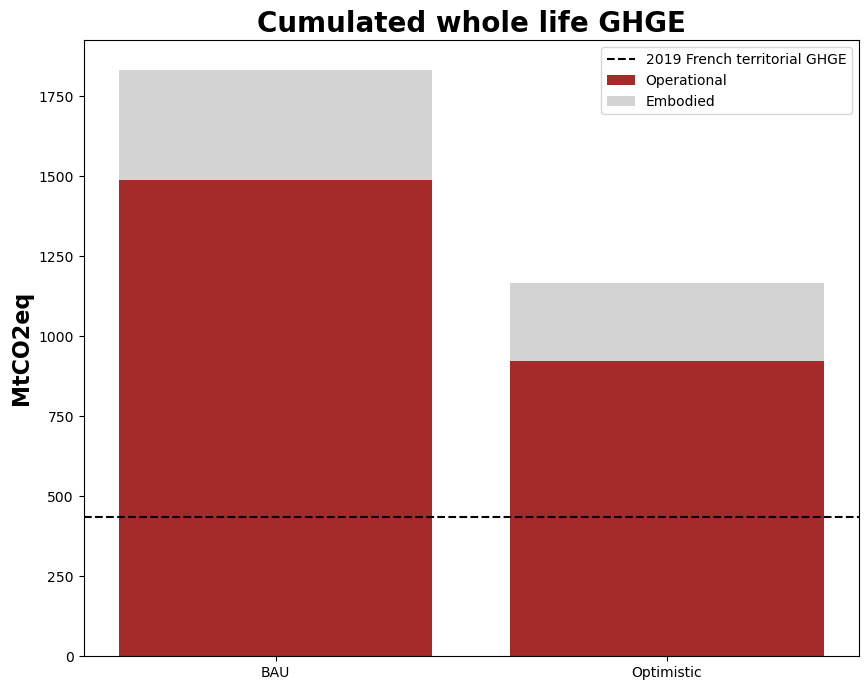

In [117]:
graph_cum = wlc_cum_graph(operational_bau, operational_optimistic, embodied_bau, embodied_optimistic)

In [ ]:
def operational_all_stock_combined(construction, remaining):
    
    combined_list = []
    
    for construction_scenario in construction.scenario:
        df_construction = construction.filter(scenario=construction_scenario).data
        
        # We add blabala
        df_construction['year'] = df_construction['year'] + 1
        df_construction['dpe'] = 'new'

        for remaining_scenario in remaining.scenario:
            df_remaining = remaining.filter(scenario=remaining_scenario).data

            # We drop the sum in remaining
            df_remaining.drop(df_remaining.loc[df_remaining['dpe'] == 'sum'].index, inplace=True)
            
            # We combine the two and put the scenario name
            combined_programmation_df = pd.concat([df_construction, df_remaining])
            created_scenario_name = f'{construction_scenario}_{remaining_scenario}'
            combined_programmation_df['scenario'] = created_scenario_name
            
            combined_list.append(combined_programmation_df)
            
    combined_df = pd.concat(combined_list)
    combined_iamdf = pyam.IamDataFrame(combined_df)
            
    return combined_programmation_iamdf

In [118]:
48*3

144

In [119]:
33.87/3

11.29